In [2]:
# Importo librerías
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro

In [3]:
# 1.- Importa el fichero EXA4.csv en un dataframe.
# Muestra el nombre de las columnas, muestra la
# información del tipo de dato de cada columna y
# muestra el numero de celdas del dataframe.

fich1= 'EXA4.csv'
df = pd.read_csv(fich1)
df

,ID,ESTUDIOS,IDIOMAS,ERASMUS,PRESIONARTERIAL,ASTRONAUTA
0,1,bachillerato,english,si,12,si
1,2,fp,NaN,no,14,no
2,3,fp,NaN,no,14,no
3,4,eso,NaN,si,12,si
4,5,NaN,english,si,13,si
5,6,fp,NaN,NaN,14,no
6,7,universitarios,NaN,no,14,no
7,8,eso,english,si,14,no
8,9,NaN,NaN,no,13,si
9,10,universitarios,english,si,12,si


In [3]:
df.columns

Index(['ID', 'ESTUDIOS', 'IDIOMAS', 'ERASMUS', 'PRESIONARTERIAL',
       'ASTRONAUTA'],
      dtype='object')

In [7]:
print('Número de celdas: ',df.shape[0]*df.shape[1])

Número de celdas:  120


In [8]:
# 2.- Transforma las columnas object a categóricas y
# posteriormente a numéricas. Rellena los nulos

df.dtypes

ID                  int64
ESTUDIOS           object
IDIOMAS            object
ERASMUS            object
PRESIONARTERIAL     int64
ASTRONAUTA         object
dtype: object

In [10]:
df.isnull().sum()

ID                 0
ESTUDIOS           3
IDIOMAS            9
ERASMUS            3
PRESIONARTERIAL    0
ASTRONAUTA         0
dtype: int64

In [11]:
le = LabelEncoder()

In [12]:
df.ESTUDIOS = le.fit_transform(df.ESTUDIOS.values)

In [13]:
df.IDIOMAS = le.fit_transform(df.IDIOMAS.values)

In [14]:
df.ERASMUS = le.fit_transform(df.ERASMUS.values)

In [17]:
df.ASTRONAUTA = le.fit_transform(df.ASTRONAUTA.values)

In [18]:
df.dtypes

ID                 int64
ESTUDIOS           int64
IDIOMAS            int64
ERASMUS            int64
PRESIONARTERIAL    int64
ASTRONAUTA         int64
dtype: object

In [19]:
df.isnull().sum()

ID                 0
ESTUDIOS           0
IDIOMAS            0
ERASMUS            0
PRESIONARTERIAL    0
ASTRONAUTA         0
dtype: int64

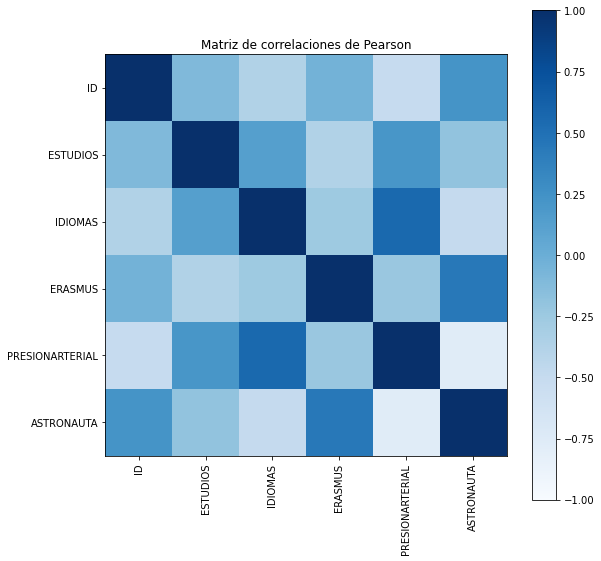

In [20]:
# 3.- Dibuja el grafico de la matriz de correlación

matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [22]:
# 4.- Normaliza los datos numéricos y divídelos en train
# y test

X = df.drop('ASTRONAUTA', axis=1)
Y = df['ASTRONAUTA']

In [23]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PRESIONARTERIAL,-0.768035
IDIOMAS,-0.492366
ERASMUS,0.438529
ID,0.230098
ESTUDIOS,-0.194572


In [24]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

In [26]:
# 5.- Aplica el modelo de Regresión Logistica,
# umbraliza los datos y matriz de confusión (2 punto)
modelo = LogisticRegression()
parametros = {"C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [27]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [28]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC AUC: 1.0


In [29]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

In [30]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [31]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [32]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

In [33]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [34]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [35]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))

Matriz de confusión
 [[1 0]
 [3 0]]

Accuracy	0.25
Sensitividad	0.0
Precisión	0.0


In [36]:
# 6.- Aplica el modelo de Arboles de Decisión,
# umbraliza los datos y matriz de confusión

regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(regr_opt.best_estimator_))

El mejor estimador es: DecisionTreeRegressor(max_depth=3)


In [37]:
y_test_pred = regr_opt.predict(X_test)
y_test_pred.shape

(4,)

In [38]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred[:] > umbral)

In [39]:
Y_test.shape

(4,)

In [40]:
Y_test

18    1
1     0
19    1
8     1
Name: ASTRONAUTA, dtype: int64

In [41]:
y_umbralizadas.shape

(4,)

In [42]:
y_umbralizadas

array([1, 0, 1, 1])

In [43]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[1 0]
 [0 3]]


In [46]:
# 7.- Aplica el modelo de KNN Vecinos , umbraliza los
# datos y matriz de confusión

y_ruido = np.sin(X_train)[:, 0] + np.random.normal(size=X_train.shape[0],scale=0.20)

In [47]:
x_train2=X_train[:,0]

In [48]:
clf = KNeighborsRegressor()
params = {"n_neighbors": range(1, 20)}

In [49]:
clf_gs = GridSearchCV(clf, params, cv=3)
clf_gs.fit(X_train, Y_train)
print('El mejor estimador es: {}'.format(clf_gs.best_estimator_))

El mejor estimador es: KNeighborsRegressor(n_neighbors=6)


In [50]:
y_test_predict=clf_gs.predict(X_test)

In [1]:
umbral = 0.6
y_umbralizadas = 1*(y_test_predict[:] > umbral)

NameError: name 'y_test_predict' is not defined

In [52]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[1 0]
 [1 2]]
